## PROJECT 03

Taking a more in-depth look into string and wave simulation.

In this project, I investigate the motion of a string that is fixed at one end and free at the other end. Here are some properties to examine:

-What are the boundary conditions?

-Does a Gaussian reflecting off the free end invert?

-What are the eigenvalues and eigenvectors, and what are the normal modes?

-Show the evolution of the string for a given initial condition (like a string plucked in the middle though one end is free).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ode
from scipy.optimize import curve_fit
from scipy.linalg import eigh

ModuleNotFoundError: No module named 'ode'

In [2]:
from IPython.display import HTML

def playVideo(path):
    return HTML("""
                <video width="320" height="240" controls>
                  <source src="{}" type="video/mp4">
                </video>
                """.format(path))

In [3]:
from mplEasyAnimate import animation
from tqdm import tqdm

## GAUSIAN REFLECTION

This section can be shown with an edit to our 03-05 workbook code. This wavemotion is simulated using the FDM method, and the endpoint conditions are buried within the equations that describe the displacement


$$u_{m}^{n+1} = 2(1-\beta^2)u_m^n - u_m^{n-1} + \beta^2(u_{m-1}^n+u_{m+1}^n)$$

Where the subscript $m$ is used to indicate the $m^{th}$ index of the grid position $x_m$. The superscript $n$ is used to indicate the $n^{th}$ step in time. Thus, the boundary conditions are never explicitely encoded. This leads us to look into explicitely controlling the boundary coditions.

In [9]:
def wavemotion(u0, u1):
    u2 = 2*(1-b)*u1 - u0                   # unshifted terms 
    u2[1:-1] += b*( u1[0:-2] + u1[2:] )      # left, right 
    return u2

def gaussian(x):
    return np.exp(-(x-5)**2)


In this next cell, the wavemotion is integrated in the bottom for loop. In that loop, we set
$$u2[N] = u2[N-1]$$

Which explicitely sets the rightmost point of the string equal to the displacement of the second to right most point on the string, rather than the last point being hardcoded to 0 displacement.

In [10]:
L, N = 10, 100           # length of string, number of intervals
b = 1.0                    # beta^2

t_total = 20
N_t = 200 #number of time intervals
dt = t_total/N_t
t = 0
ta = np.linspace(0,t_total,N_t+1)

x = np.linspace(0, L, N+1)
u0, u1 = gaussian(x), gaussian(x)

data = np.zeros((N_t+1,N+1))  #columns are u at grid points
data[0]=u0
data[1]=u1

for i in range(N_t):
    u2 = wavemotion(u0, u1)
    u2[N]=u2[N-1]  #### this is the only new line
    u0, u1 = u1, u2
    data[i]=u2

In [11]:
def easyanimate_string(t_array, u_array, filename):
    xa = np.linspace(0., L, N+1)

    t_offsets = t_array
    anim = animation(filename)
    i=0
    for offset in tqdm(t_offsets):
        fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        ax.plot(xa, u_array[i,:])
        ax.set_xlim(0,L)
        ax.set_ylim(-1.1,1.1)
        
        anim.add_frame(fig)
        plt.close(fig)
        i=i+1
    anim.close()    

In [8]:
file='string.mp4'
easyanimate_string(ta,data,file)

100%|██████████| 201/201 [00:33<00:00,  5.98it/s]


When the string is animated, you can see the boundary behavior of the gaussian on the right side--instead of reflecting and inverting like the left side, the wave simply rebounds.

In [10]:
playVideo(file)

In [12]:
L, N = 10, 100           # length of string, number of intervals
b = 1.0                    # beta^2
h = L/N

t_total = 20
N_t = 200 #number of time intervals
dt = t_total/N_t
t = 0
ta = np.linspace(0,t_total,N_t+1)

x = np.linspace(0, L, N+1)
u0 = gaussian(x)
u1 = gaussian(x-b*h)

data = np.zeros((N_t+1,N+1))  #columns are u at grid points
data[0]=u0
data[1]=u1

for i in range(N_t):
    u2 = wavemotion(u0, u1)
    u2[N]=u2[N-1]  #### this is the only new line
    u0, u1 = u1, u2
    data[i]=u2

data.shape


(201, 101)

In [13]:
file='string-2.mp4'
easyanimate_string(ta,data,file)

100%|██████████| 201/201 [00:33<00:00,  6.07it/s]


The reflection can also be seen in the following video, where the wave is given an initial velocity towards the open-end at the right. The wave reflects off that end, but only inverts when reflecting off the fixed end at the left.

In [14]:
playVideo(file)

## EIGENVALUES AND EIGENVECTORS

In considering the motion of waves from 

In [14]:
def normal_modes(Natoms, ks, mass, ui, udoti, t_total):
    global N, k, m
    N=Natoms
    k=ks
    m=mass
    
    #Build matrices
    A=np.zeros((Natoms,Natoms))

    for i in range(Natoms):
        A[i,i] = 2*ks
        if i==0:
            A[0,i+1]=-ks
        elif i==Natoms-1:
            A[i,i-1]=-ks
        else:
            A[i,i-1]=-ks
            A[i,i+1]=-ks

    #Define our second boundary condition to be free rather than fixed
    A[Natoms-1,Natoms-1] = ks
    temp = np.identity(Natoms)
    temp[:Natoms/2] =
    B=
    mass*np.identity(Natoms)

    #find eigenvalues and eigenvectors
    lamb, a = eigh(A, B)        # eigenvalues and eigenvectors  
    #print("eigenvalues (omega^2):", lamb)
    #print("eigenvectors are column vectors in:\n\n", a)

    #Find coefficients for normal modes
    Acoeffs = np.linalg.solve(a,ui)

    #build the general solution
    t = np.linspace(0,t_total,1000)

    omegas = np.sqrt(lamb)
    u_atoms = np.zeros((Natoms,len(t)))

    for i in range(Natoms):
        for w in range(0,len(omegas)):
            u_atoms[i] = u_atoms[i] + Acoeffs[w]*a[i,w]*np.cos(omegas[w]*t)

    return omegas, a, u_atoms, t

In [15]:
def plot_mode_teq0(mode, freqs, vecs): #plot normal mode at t=0
    
    u_mode = vecs[:,mode]
    u_mode_with_boundary=np.insert(u_mode,0,0) #add 0 to beginning of array
    #u_mode_with_boundary=np.append(u_mode_with_boundary,0) #add 0 to end of array
    xa = np.linspace(0,L,Natoms+1)
        
    plt.figure()
    plt.title("normal mode %d" % mode)
    plt.plot(xa,u_mode_with_boundary, 'b-', label='u_i')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend(loc='lower right')
    plt.show()


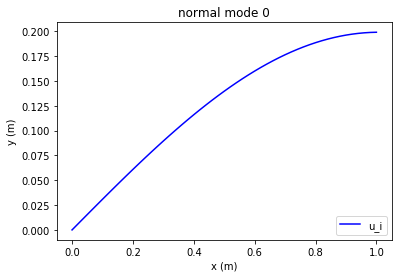

In [16]:
Natoms = 50
ks = 1
mass = 1
L = 1
L0 = L/(Natoms+1)
F_T = ks*L0
t_tot = 10*np.pi

u_i = np.zeros(Natoms)
udot_i = np.zeros(Natoms)

eig_freq, eig_vec, u, ta = normal_modes(Natoms, ks, mass, u_i, udot_i, t_tot)
plot_mode_teq0(0,eig_freq,eig_vec)

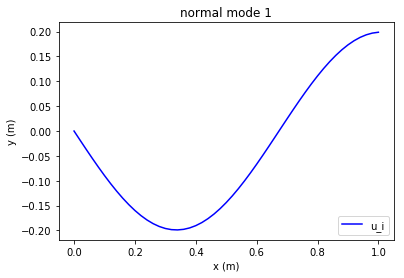

In [17]:
plot_mode_teq0(1,eig_freq,eig_vec)

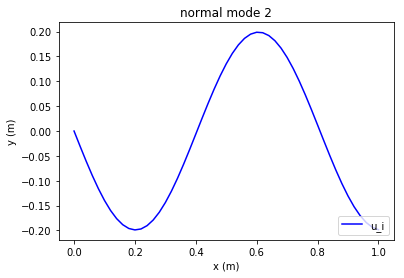

In [18]:
plot_mode_teq0(2,eig_freq,eig_vec)

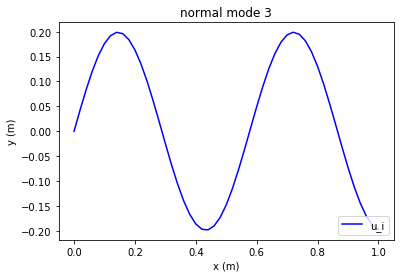

In [19]:
plot_mode_teq0(3,eig_freq,eig_vec)

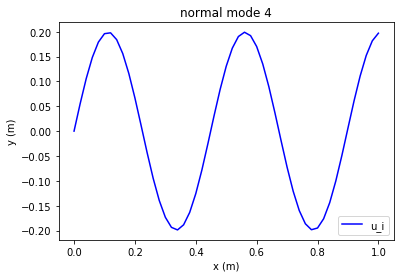

In [20]:
plot_mode_teq0(4,eig_freq,eig_vec)

In [21]:
def plot_ui0(u_i): #plot normal mode at t=0
    
    u_with_boundary=np.insert(u_i,0,0) #add 0 to beginning of array
    u_with_boundary=np.append(u_with_boundary,0) #add 0 to end of array
    xa = np.linspace(0,L,Natoms+2)
        
    plt.figure()
    plt.title("u (t=0)")
    plt.plot(xa,u_with_boundary, 'b-', label='u')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend(loc='lower right')
    plt.show()

In [22]:
Natoms = 50
ks = 1
mass = 1
L = 1
L0 = L/(Natoms+1)
F_T = ks*L0
t_tot = 5*10*np.pi

xi=np.linspace(L0,L-L0,Natoms)

u_i = 0.1*np.sin(np.pi/L*xi)
udot_i = np.zeros(Natoms)

eig_freq, eig_vec, u, ta = normal_modes(Natoms, ks, mass, u_i, udot_i, t_tot)

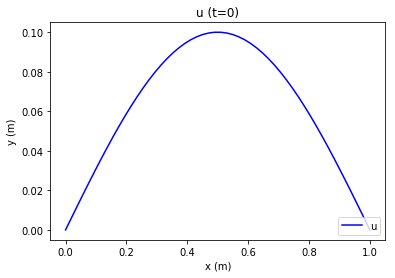

In [23]:
plot_ui0(u_i)

In [24]:
from mplEasyAnimate import animation
from tqdm import tqdm

In [25]:
def easyanimate_string(t_array, u_array, filename):
    xa = np.linspace(L0,L-L0,Natoms)

    t_offsets = t_array
    anim = animation(filename)
    i=0
    for offset in tqdm(t_offsets):
        fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        ax.plot(xa, u_array[:,i])
        ax.set_xlim(0,L)
        ax.set_ylim(-0.11,0.11)
        
        if i % 10:
            anim.add_frame(fig)
        plt.close(fig)
        i=i+1
    anim.close()    

 81%|████████▏ | 813/1000 [02:41<00:37,  5.04it/s]

OSError: [Errno 32] Broken pipe

FFMPEG COMMAND:
/home/soundofives/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1 -y -f rawvideo -vcodec rawvideo -s 1504x1056 -pix_fmt rgba -r 10.00 -i - -an -vcodec libx264 -pix_fmt yuv420p -crf 25 -v warning /home/soundofives/Desktop/Classes/PHY/Computational/03-and-04-project-soundofives/string-fundamental.mp4

FFMPEG STDERR OUTPUT:


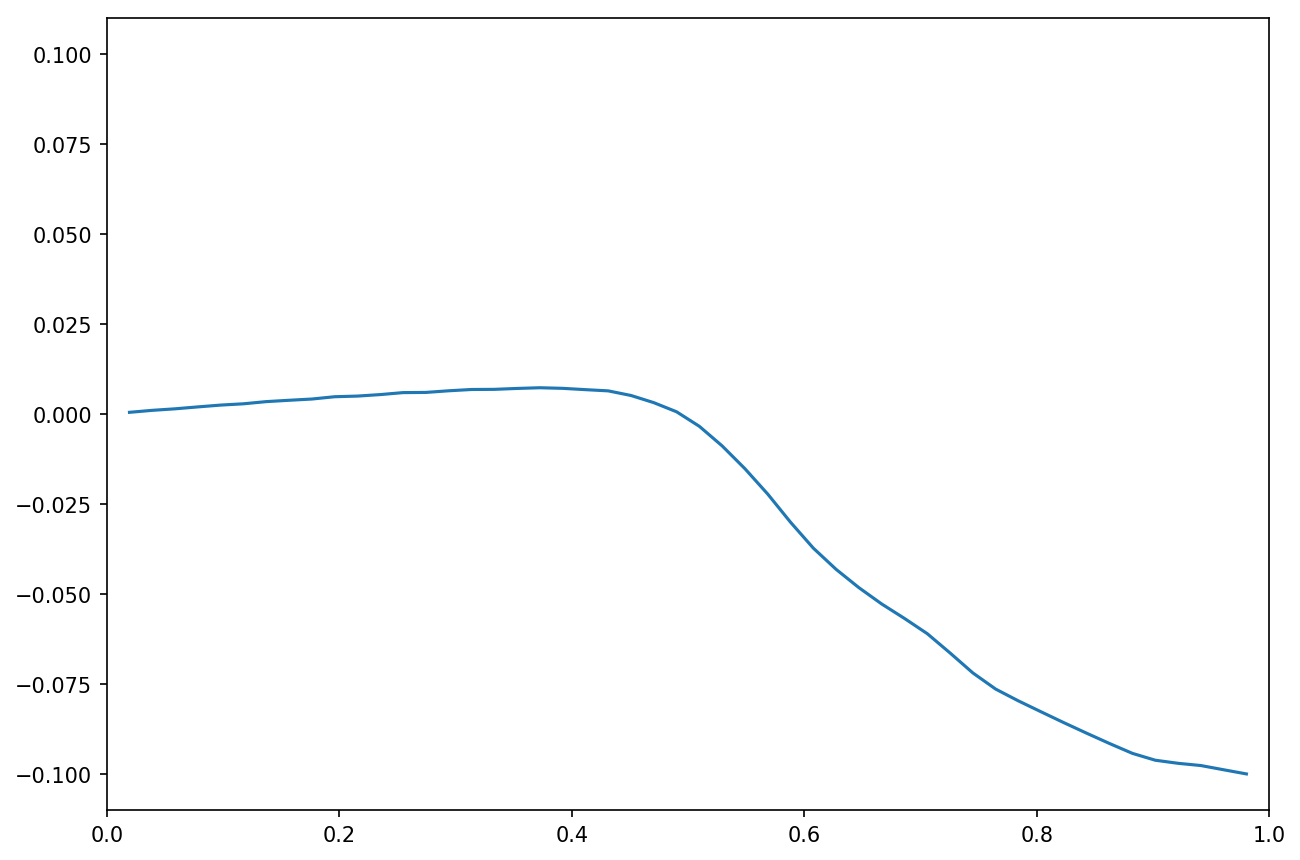

In [26]:
file1='string-fundamental.mp4'
easyanimate_string(ta,u,file1)

In [17]:
playVideo(file1)